# Summary
This demonstrates reconstruction of a Fresnel CDI dataset and compares the result to ePIE reconstruction. 

The probe structure allows reconstruction in CDI mode, i.e. without real-space overlap constraints. 

Scanning CDI reconstruction is also possible here, but results in a lower-quality image because of scan position jitter in this dataset.

## Object ePIE reconstruction: 
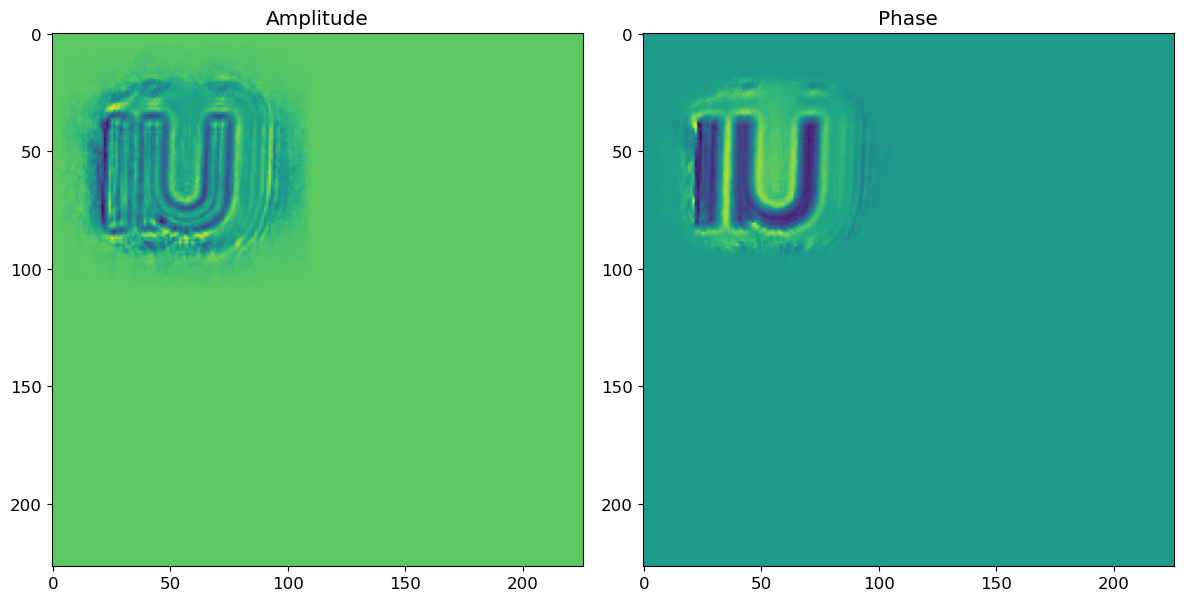

In [1]:
from scipy.ndimage import zoom
import numpy as np

def init():
    from ptycho import params as p

    # p.cfg['object.big'] = False
    p.cfg['nphotons'] = 1e5
    p.cfg['N'] = 128
    p.cfg['nepochs'] = 100
    p.cfg['output_prefix'] = 'tmp'
    p.cfg['nimgs_train'] = 1
    p.cfg['nimgs_test'] = 1
    p.cfg['intensity_scale.trainable'] = True
    p.cfg['positions.provided'] = True
    p.cfg['probe.big'] = True
    p.cfg['probe.trainable'] = True
    p.cfg['probe.mask'] = False

    p.cfg['data_source'] = 'generic'
    p.cfg['gridsize'] = 1
    p.cfg['probe_scale'] = 5
    p.cfg['train_data_file_path'] = 'train_data.npz'
    p.cfg['test_data_file_path'] = 'test_data.npz'


# IMPORTANT: must call init() BEFORE the dataset definition
init()
data_file_path = 'xppl1026722_Run0396_recon_128.npz'

In [2]:
!ln -s ../tests/test_generic_loader.py
import test_generic_loader;
train_raw, test_raw = test_generic_loader.test_generic_loader(remove = False,
            data_file_path = data_file_path);

ln: failed to create symbolic link './test_generic_loader.py': File exists


2024-06-04 23:06:31.883463: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 23:06:31.883492: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 23:06:31.884650: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-04 23:06:31.890140: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 23:06:32.390835: W tensorflow/compiler/tf2

DEBUG: Setting probe_mask to tf.Tensor(
[[[[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]

  ...

  [[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]]


 [[[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]

  ...

  [[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]]


 [[[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]

  ...

  [[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]]


 ...


 [[[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]

  ...

  [[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]]


 [[[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]

  ...

  [[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]]


 [[[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]

  ...

  [[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]]], shape=(128, 128, 1, 1), dtype=complex64) in params
diff3d shape: (1087, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (1087,)
objectGuess shape: (227, 226)
xcoords shape: (1087,)
ycoords shape: (1087,)
xcoords_start shape: (1087,)
ycoords_start shape: (1087,)
diff3d shape: (512, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (512,)
objectGuess shape: (227, 226)
xcoords shape: (51

In [3]:
# from ptycho import probe
# from ptycho import params as p

# from ptycho.xpp import *
# probe_amp = np.absolute(probeGuess)
# mask = np.absolute(p.get('probe_mask'))[:, :, 0, 0]
# probe.set_probe_guess(None, probeGuess)

# from ptycho.evaluation import save_metrics
# from ptycho.evaluation import trim
# from ptycho import tf_helper as hh

In [4]:
# plt.imshow(np.angle(probeGuess2))
# plt.colorbar()

In [5]:
from ptycho import probe
from ptycho import params as p

from ptycho import xpp
ptycho_data, ptycho_data_train, obj = xpp.load_ptycho_data(data_file_path)

diff3d shape: (1572, 128, 128)
probeGuess shape: (128, 128)
scan_index shape: (1572,)
objectGuess shape: (379, 547)
xcoords shape: (1572,)
ycoords shape: (1572,)
xcoords_start shape: (1572,)
ycoords_start shape: (1572,)
diff3d shape: (512, 128, 128)
probeGuess shape: (128, 128)
scan_index shape: (512,)
objectGuess shape: (379, 547)
xcoords shape: (512,)
ycoords shape: (512,)
xcoords_start shape: (512,)
ycoords_start shape: (512,)


In [6]:
# plt.imshow(np.angle(obj['probeGuess']))

In [7]:
# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt

# def load_tiff_image(file_path: str) -> Image:
#     """Load a TIFF image from the given file path."""
#     return Image.open(file_path)

# def convert_to_array(image: Image) -> np.ndarray:
#     """Convert a PIL Image to a 2D NumPy array."""
#     image_array = np.array(image)
#     assert len(image_array.shape) == 2, "The image is not grayscale."
#     return image_array

# def display_heatmap(image_array: np.ndarray) -> None:
#     """Display a heatmap of the 2D NumPy array."""
#     plt.imshow(image_array, cmap='hot', interpolation='nearest')
#     plt.colorbar()  # Add a colorbar to the heatmap
#     plt.title('Heatmap of Grayscale Image')
#     plt.show()

# # Example usage
# file_path = '/home/ollie/Downloads/probe_174.tiff'
# image = load_tiff_image(file_path)
# probephase = convert_to_array(image)
# # display_heatmap(image_array)

# # Example usage
# file_path = '/home/ollie/Downloads/final_probe_KMPIE_2024_05_20-12_56_23-0_mag@1.tiff'
# image = load_tiff_image(file_path)
# probeamp = convert_to_array(image)
# # display_heatmap(image_array)

# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt

# def load_tiff_image(file_path: str) -> Image:
#     """Load a TIFF image from the given file path."""
#     return Image.open(file_path)

# def convert_to_array(image: Image) -> np.ndarray:
#     """Convert a PIL Image to a 2D NumPy array."""
#     image_array = np.array(image)
#     assert len(image_array.shape) == 2, "The image is not grayscale."
#     return image_array

# def binning(image_array: np.ndarray, bin_size: int) -> np.ndarray:
#     """Perform binning on the image array."""
#     shape = (image_array.shape[0] // bin_size, image_array.shape[1] // bin_size)
#     binned_array = image_array.reshape(shape[0], bin_size, shape[1], bin_size).mean(axis=(1, 3))
#     return binned_array

# def combine_phase_amplitude(probephase: np.ndarray, probeamp: np.ndarray) -> np.ndarray:
#     """Combine phase and amplitude into a complex-valued array."""
#     return probeamp * np.exp(1j * probephase)


# # Perform 4x4 binning
# bin_size = 2
# probephase_binned = binning(probephase, bin_size)
# probeamp_binned = binning(probeamp, bin_size * 2)

# # Combine the binned phase and amplitude into a complex-valued array
# probeGuess = combine_phase_amplitude(probephase_binned, probeamp_binned)

# # Check the shape and dtype
# print(probeGuess.shape, probeGuess.dtype)


In [8]:
obj['probeGuess'].shape

(128, 128)

In [9]:
probeGuess = obj['probeGuess']

In [10]:
objectGuess = ptycho_data.objectGuess 


probe_amp = np.absolute(probeGuess)
mask = np.absolute(p.get('probe_mask'))[:, :, 0, 0]
probe.set_probe_guess(None, probeGuess)

from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh

DEBUG: Setting probe to tf.Tensor(
[[[-0.23906307+1.64530486e-01j]
  [-0.13252681+3.07532281e-01j]
  [ 0.00831009-2.61296779e-01j]
  ...
  [ 0.21705988+8.26436281e-02j]
  [-0.37323087-5.64008355e-02j]
  [-0.06012105+3.71795416e-01j]]

 [[ 0.2698967 -2.84690559e-01j]
  [ 0.42549056-2.71461345e-02j]
  [ 0.34819037-1.19714804e-01j]
  ...
  [ 0.33647934+1.54674441e-01j]
  [-0.49408582+1.49588570e-01j]
  [ 0.14993416+3.70039530e-02j]]

 [[-0.11506186-5.64315729e-02j]
  [-0.53292644+1.30575031e-01j]
  [ 0.39854988+1.81760222e-01j]
  ...
  [-0.35978264+3.19278270e-01j]
  [-0.13462344-4.07271311e-02j]
  [ 0.06092303+2.21775636e-01j]]

 ...

 [[ 0.26181674-8.21096376e-02j]
  [-0.27524817-2.81510979e-01j]
  [-0.24665582-7.70172104e-02j]
  ...
  [ 0.5173621 -2.67907411e-01j]
  [-0.2979412 -4.31340307e-01j]
  [-0.10610206-3.57290417e-01j]]

 [[-0.44114807-9.97117534e-02j]
  [ 0.12143852-8.64980221e-02j]
  [-0.21738133+1.16406046e-01j]
  ...
  [ 0.06056998-1.98923983e-04j]
  [-0.11400189+3.47741365

In [11]:
import tensorflow as tf

tf.random.set_seed(45)
np.random.seed(45)
from ptycho import params as p
from ptycho import train, model
from ptycho.train import *
from ptycho.nbutils import *

# channel dimensions size should be 1 in CDI mode, 4 in ptycho mode
ptycho_dataset.test_data.X.shape, ptycho_dataset.train_data.X.shape

DEBUG: Setting timestamp to 06/04/2024, 23:06:47 in params
diff3d shape: (512, 128, 128)
probeGuess shape: (128, 128)
scan_index shape: (512,)
objectGuess shape: (379, 547)
xcoords shape: (512,)
ycoords shape: (512,)
xcoords_start shape: (512,)
ycoords_start shape: (512,)
diff3d shape: (1572, 128, 128)
probeGuess shape: (128, 128)
scan_index shape: (1572,)
objectGuess shape: (379, 547)
xcoords shape: (1572,)
ycoords shape: (1572,)
xcoords_start shape: (1572,)
ycoords_start shape: (1572,)
DEBUG: nsamples: 1
neighbor-sampled diffraction shape (512, 128, 128, 1)
DEBUG: nsamples: 1
neighbor-sampled diffraction shape (1572, 128, 128, 1)


2024-06-04 23:06:48.083457: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


INFO: None
<PtychoDataContainer X=(512, 128, 128, 1) Y_I=(512, 128, 128, 1) Y_phi=(512, 128, 128, 1) norm_Y_I=() coords_nominal=(512, 1, 2, 1) coords_true=(512, 1, 2, 1) nn_indices=(512, 1) mean=255.500 global_offsets=(512, 1, 2, 1) mean=261.016 local_offsets=(512, 1, 2, 1) mean=0.000 probe=(128, 128, 1)>
INFO: None
<PtychoDataContainer X=(1572, 128, 128, 1) Y_I=(1572, 128, 128, 1) Y_phi=(1572, 128, 128, 1) norm_Y_I=() coords_nominal=(1572, 1, 2, 1) coords_true=(1572, 1, 2, 1) nn_indices=(1572, 1) mean=785.500 global_offsets=(1572, 1, 2, 1) mean=229.926 local_offsets=(1572, 1, 2, 1) mean=0.000 probe=(128, 128, 1)>
INFO: train data:
<PtychoDataContainer X=(512, 128, 128, 1) Y_I=(512, 128, 128, 1) Y_phi=(512, 128, 128, 1) norm_Y_I=() coords_nominal=(512, 1, 2, 1) coords_true=(512, 1, 2, 1) nn_indices=(512, 1) mean=255.500 global_offsets=(512, 1, 2, 1) mean=261.016 local_offsets=(512, 1, 2, 1) mean=0.000 probe=(128, 128, 1)>
INFO: test data:
<PtychoDataContainer X=(1572, 128, 128, 1) Y_I=

2024-06-04 23:06:50.496618: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-06-04 23:06:50.496634: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-06-04 23:06:50.496656: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1883] Profiler found 1 GPUs
2024-06-04 23:06:50.496873: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:137] cuptiGetTimestamp: error 999: 
2024-06-04 23:06:50.496881: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:186] cuptiSubscribe: ignored due to a previous error.
2024-06-04 23:06:50.496885: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:459] cuptiGetResultString: ignored due to a previous error.
2024-06-04 23:06:50.496889: E external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1935] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with

DEBUG: Setting intensity_scale to 8.519216 in params
DEBUG: Setting probe to tf.Tensor(
[[[[-0.12965369+8.92316252e-02j]]

  [[-0.07187472+1.66787356e-01j]]

  [[ 0.0045069 -1.41711950e-01j]]

  ...

  [[ 0.11772047+4.48210239e-02j]]

  [[-0.2024184 -3.05884834e-02j]]

  [[-0.03260611+2.01639891e-01j]]]


 [[[ 0.14637603-1.54399350e-01j]]

  [[ 0.23076096-1.47224609e-02j]]

  [[ 0.1888379 -6.49262443e-02j]]

  ...

  [[ 0.18248653+8.38862881e-02j]]

  [[-0.267963  +8.11280087e-02j]]

  [[ 0.08131544+2.00687591e-02j]]]


 [[[-0.06240276-3.06051541e-02j]]

  [[-0.28902784+7.08161891e-02j]]

  [[ 0.21614993+9.85760167e-02j]]

  ...

  [[-0.19512486+1.73157692e-01j]]

  [[-0.07301181-2.20879912e-02j]]

  [[ 0.03304105+1.20278016e-01j]]]


 ...


 [[[ 0.14199394-4.45314199e-02j]]

  [[-0.14927836-1.52674943e-01j]]

  [[-0.13377155-4.17695902e-02j]]

  ...

  [[ 0.28058666-1.45297170e-01j]]

  [[-0.16158572-2.33933523e-01j]]

  [[-0.0575435 -1.93773225e-01j]]]


 [[[-0.23925267-5.40777706e-0

2024-06-04 23:06:53.519280: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-06-04 23:06:53.596927: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-04 23:06:53.781230: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x622992896d50
2024-06-04 23:06:54.736414: I external/local_xla/xla/service/service.cc:168] XLA service 0x79d8b017d8a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-04 23:06:54.736434: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-06-04 23:06:54.741005: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1717556814.885495  972171 device_compiler.h:186] Compiled cluster 

31/31 [==============================] - 11s 105ms/step - loss: 23309894.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 7.3108 - distribution_lambda_loss: 23309894.0000 - val_loss: 53727.3203 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 0.7220 - val_distribution_lambda_loss: 53727.3203 - lr: 0.0010
Epoch 2/100
31/31 [==============================] - 1s 22ms/step - loss: 55393.0234 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 0.7528 - distribution_lambda_loss: 55393.0234 - val_loss: 49092.1484 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 0.7179 - val_distribution_lambda_loss: 49092.1484 - lr: 0.0010
Epoch 3/100
31/31 [==============================] - 1s 22ms/step - loss: 46226.3750 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 0.6426 - distribution_lambda_loss: 46226.3750 - val_loss: 45283.8164 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 0.6345 - val_distribution_lambda_loss: 45283.8164 - lr: 

(TensorShape([1572, 128, 128, 1]), TensorShape([512, 128, 128, 1]))

# Dataset description

In [12]:
print(test_raw)

RawData: 
xcoords: (1572,) 
ycoords: (1572,) 
xcoords_start: (1572,) 
ycoords_start: (1572,) 
diff3d: (1572, 128, 128) 
probeGuess: (128, 128) 
scan_index: (1572,) 
objectGuess: Present


In [13]:
test_data = ptycho_dataset.test_data
train_data = ptycho_dataset.train_data

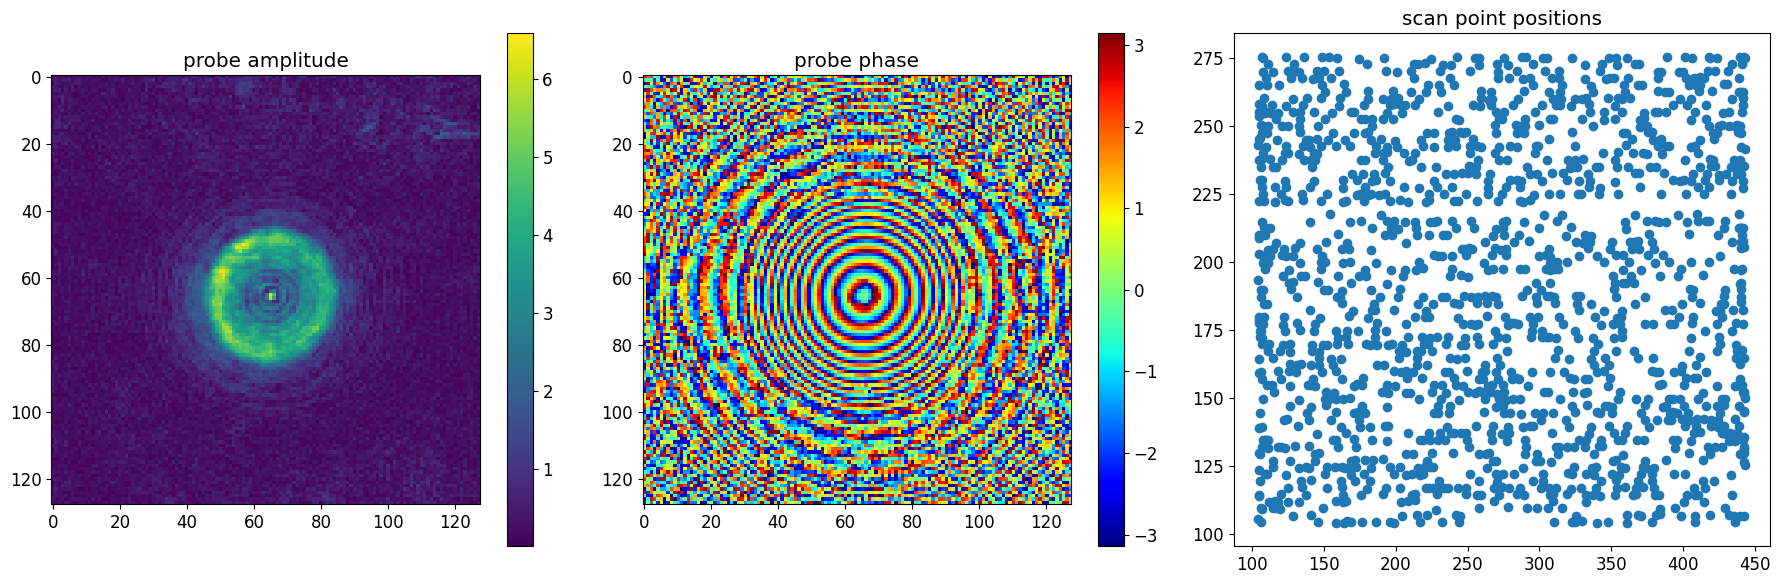

In [14]:
# Note the randomized scan point positions
probeshow(probeGuess, ptycho_dataset.test_data)

## Reconstruct the full test object image and compare to the ePIE reconstruction:

In [15]:
from ptycho import loader

In [16]:
# plt.hist(np.ravel(obj['diffraction']), bins = 1000);
# plt.semilogy()
# plt.xlim(0, 1)

50/50 [==============================] - 1s 12ms/step
PADDING SIZE: 174
PADDING SIZE: 174


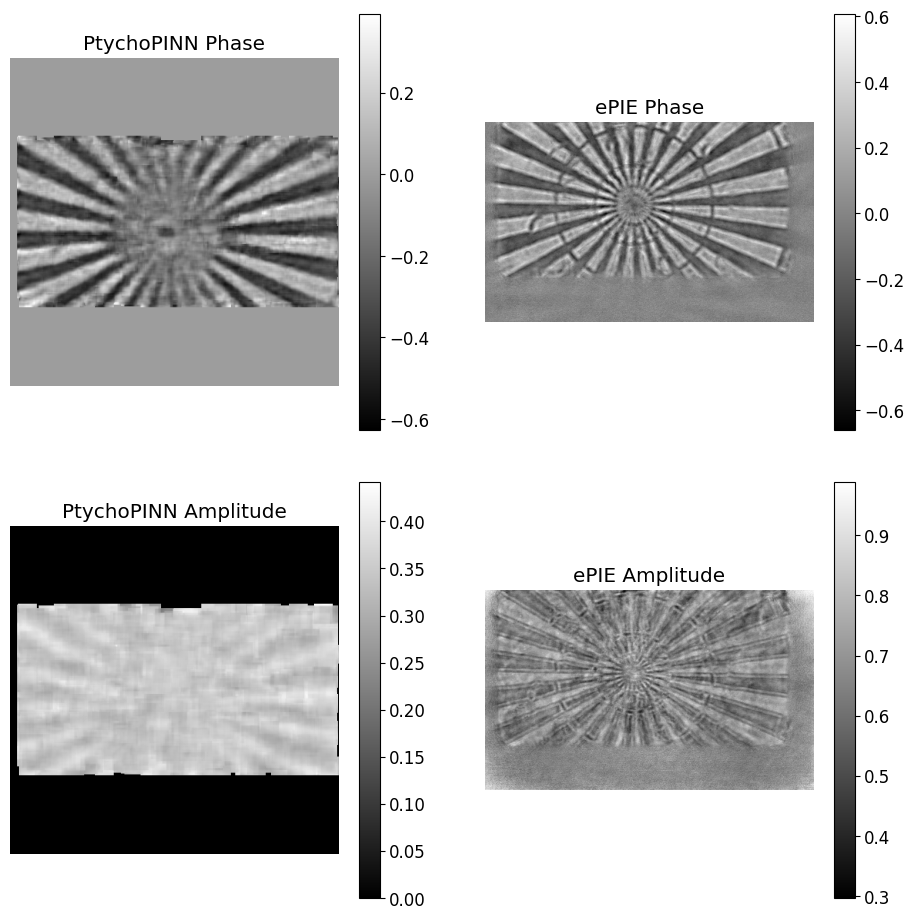

CPU times: user 1.31 s, sys: 494 ms, total: 1.81 s
Wall time: 1.83 s


In [17]:
%%time
obj_tensor_full, global_offsets = reconstruct_image(test_data)
obj_image = loader.reassemble_position(obj_tensor_full, global_offsets[:, :, :, :], M = 20)

recon_amp_ptychopinn = np.absolute(obj_image)
recon_phase_ptychopinn = np.angle(obj_image)

ptycho_pinn_phase = recon_phase_ptychopinn[..., 0]
ptycho_pinn_amplitude = recon_amp_ptychopinn[..., 0]

epie_phase = crop_to_non_uniform_region_with_buffer(np.angle(objectGuess), buffer=-20)
epie_amplitude = crop_to_non_uniform_region_with_buffer(np.absolute(objectGuess), buffer=-20)

mk_epie_comparison2x2(ptycho_pinn_phase, epie_phase, ptycho_pinn_amplitude,epie_amplitude)

50/50 [==============================] - 1s 12ms/step
PADDING SIZE: 174
PADDING SIZE: 174


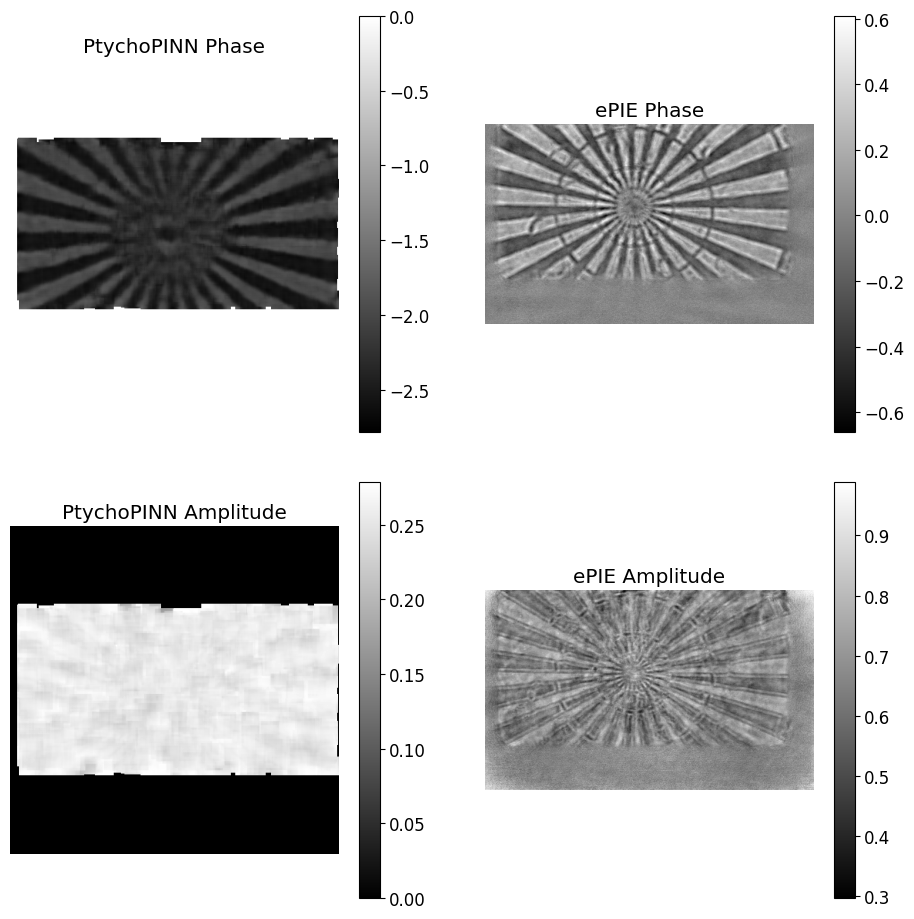

CPU times: user 1.14 s, sys: 537 ms, total: 1.68 s
Wall time: 1.74 s


In [17]:
%%time
obj_tensor_full, global_offsets = reconstruct_image(test_data)
obj_image = loader.reassemble_position(obj_tensor_full, global_offsets[:, :, :, :], M = 20)

recon_amp_ptychopinn = np.absolute(obj_image)
recon_phase_ptychopinn = np.angle(obj_image)

ptycho_pinn_phase = recon_phase_ptychopinn[..., 0]
ptycho_pinn_amplitude = recon_amp_ptychopinn[..., 0]

epie_phase = crop_to_non_uniform_region_with_buffer(np.angle(objectGuess), buffer=-20)
epie_amplitude = crop_to_non_uniform_region_with_buffer(np.absolute(objectGuess), buffer=-20)

mk_epie_comparison2x2(ptycho_pinn_phase, epie_phase, ptycho_pinn_amplitude,epie_amplitude)

50/50 [==============================] - 1s 12ms/step
PADDING SIZE: 174
PADDING SIZE: 174


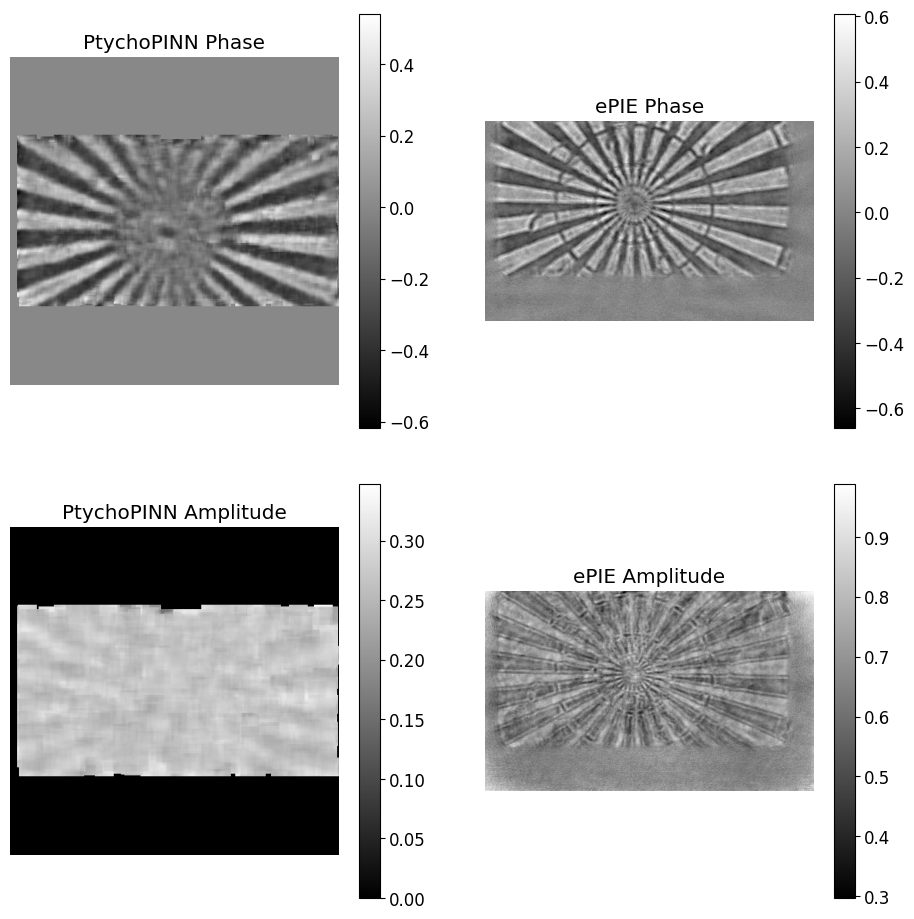

CPU times: user 1 s, sys: 534 ms, total: 1.54 s
Wall time: 1.51 s


In [18]:
%%time
obj_tensor_full, global_offsets = reconstruct_image(test_data)
obj_image = loader.reassemble_position(obj_tensor_full, global_offsets[:, :, :, :], M = 20)

recon_amp_ptychopinn = np.absolute(obj_image)
recon_phase_ptychopinn = np.angle(obj_image)

ptycho_pinn_phase = recon_phase_ptychopinn[..., 0]
ptycho_pinn_amplitude = recon_amp_ptychopinn[..., 0]

epie_phase = crop_to_non_uniform_region_with_buffer(np.angle(objectGuess), buffer=-20)
epie_amplitude = crop_to_non_uniform_region_with_buffer(np.absolute(objectGuess), buffer=-20)

mk_epie_comparison2x2(ptycho_pinn_phase, epie_phase, ptycho_pinn_amplitude,epie_amplitude)

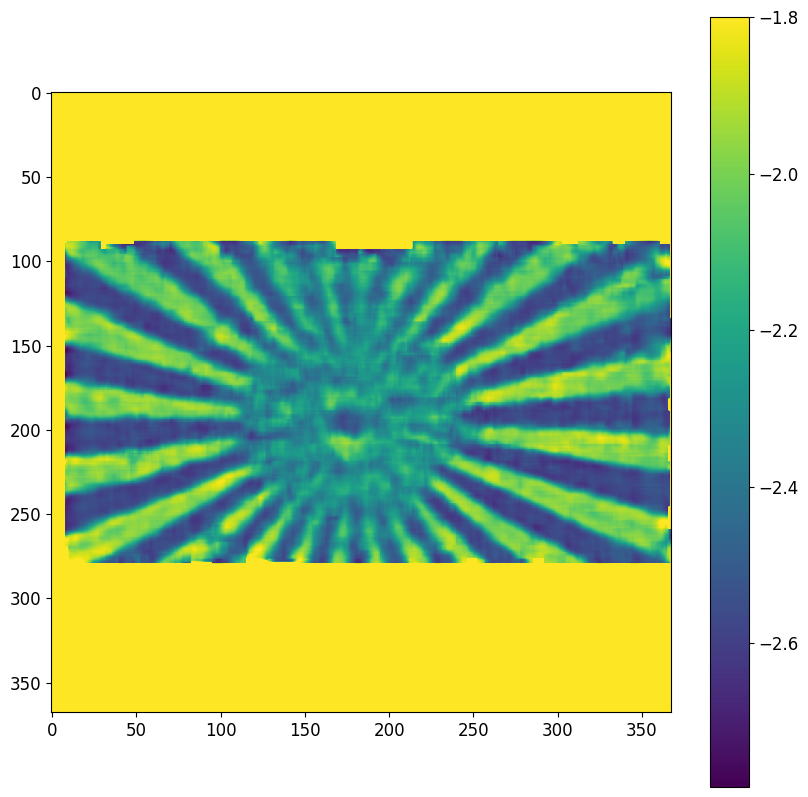

In [20]:
plt.imshow(ptycho_pinn_phase, vmax = -1.8)
plt.colorbar()

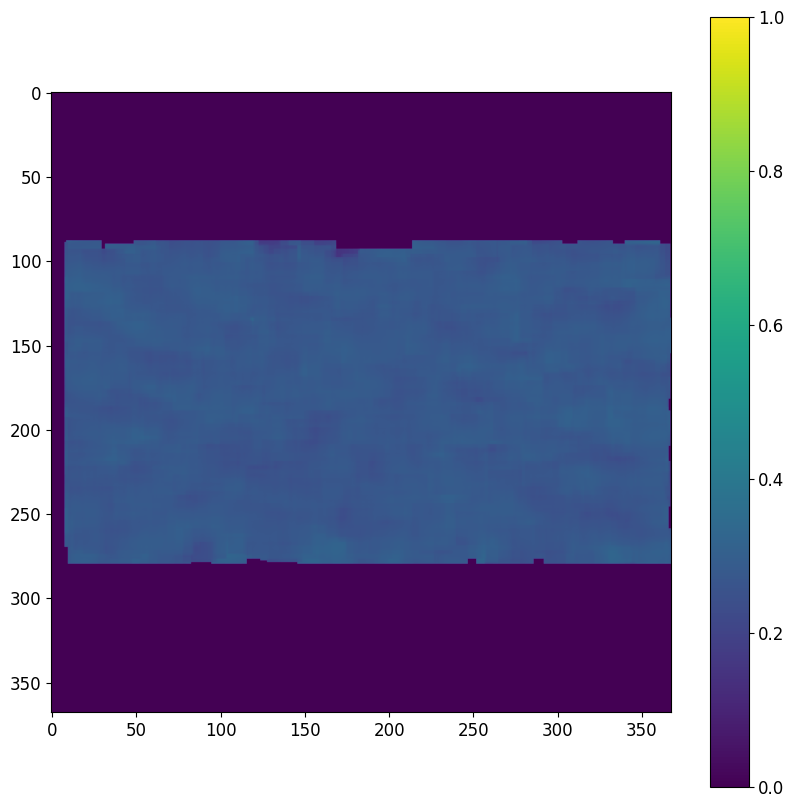

In [22]:
plt.imshow(ptycho_pinn_amplitude, vmax = 1)
plt.colorbar()

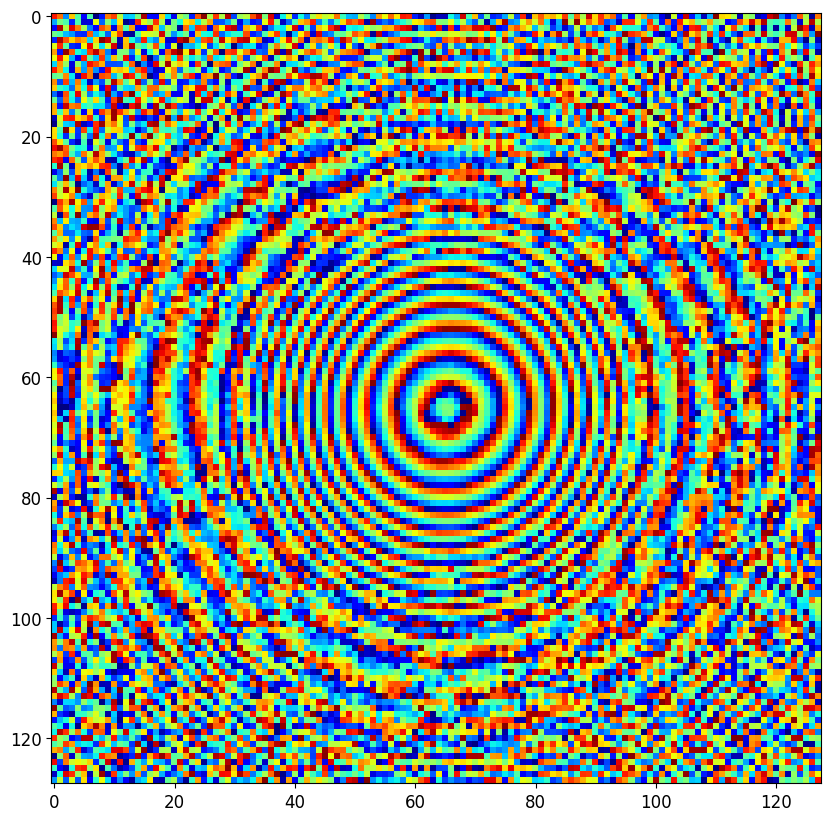

In [18]:
plt.imshow(np.angle(model.autoencoder.variables[-1]), cmap = 'jet')


Reconstruction for a single solution region:

In [19]:
Y_phi_test.shape

TensorShape([1572, 128, 128, 1])

phase min: -2.2953784 phase max: 2.8938396


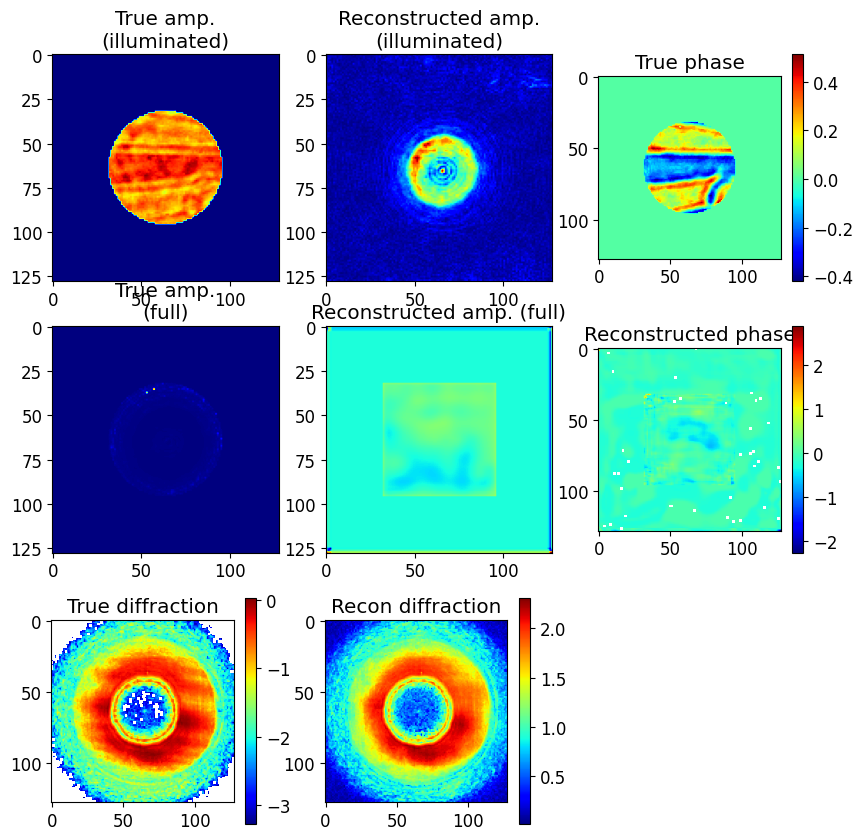

In [26]:
i = 900
from ptycho import evaluation
evaluation.summarize(i, pred_amp + 1, reconstructed_obj, X_test, Y_I_test, Y_phi_test,
                     np.absolute(p.get('probe')[:, :, 0, 0]), 0,
                    crop = False);

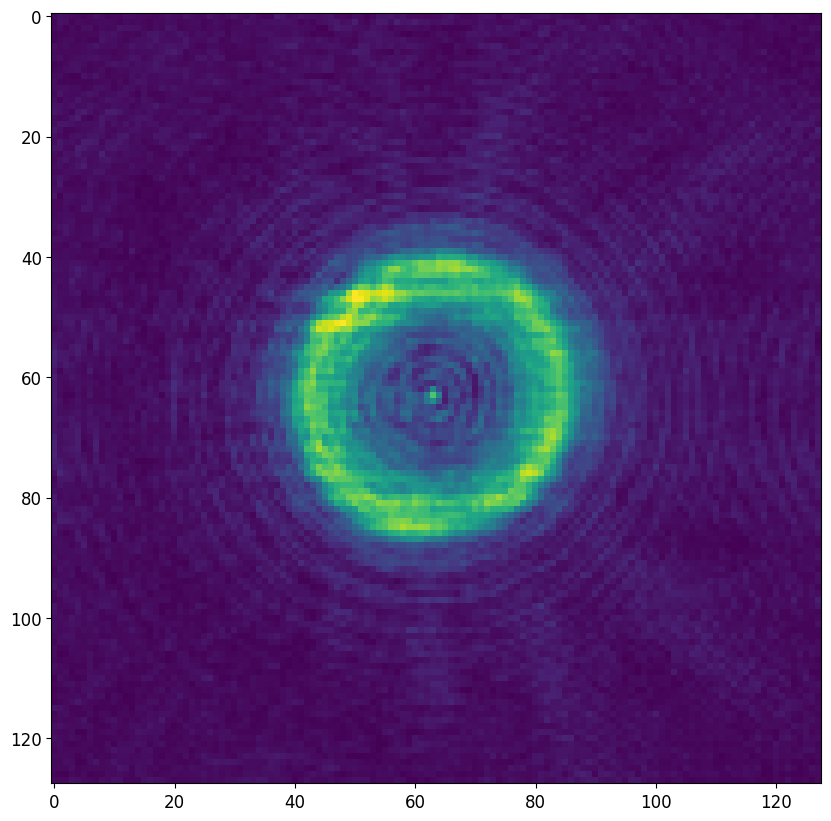

In [17]:
plt.imshow(np.abs(p.get('probe')[:, :, 0, 0]))

In [20]:
%pdb

Automatic pdb calling has been turned ON
